In [1]:
%matplotlib inline

In [2]:
import logging

In [3]:
logging.basicConfig(level=logging.INFO)

In [4]:
import numpy as np
import pandas as pd

In [5]:
from sklearn.metrics import f1_score

In [6]:
import matplotlib.pyplot as plt

In [7]:
import config
from utils.io import load_pickle
from utils.torch.datasets import PathologicalImagesDataset, PathologicalImagesDatasetMode
from utils.scoring import topcoder_metric
from predict import get_prediction_filename

# Load dataset

In [22]:
mode = PathologicalImagesDatasetMode.Val
nb_folds = 5
fold_number = 0
base_dir = config.DATASET_TRAIN_DIR

In [23]:
dataset = PathologicalImagesDataset(base_dir, mode=mode, nb_folds=nb_folds, fold_number=fold_number)

INFO:root:Data: PathologicalImagesDatasetMode.Val, fold 0 - 34 images


In [24]:
images = [dataset[i][0] for i in range(len(dataset))]
masks = [dataset[i][1] for i in range(len(dataset))]

In [25]:
images = np.stack(images)
masks = np.stack(masks)

In [26]:
images.shape, masks.shape

((34, 500, 500, 3), (34, 500, 500))

# Load predictions 

In [27]:
model_name = 'unet'
patch_size_train = 0
patch_size_predict = 0

In [28]:
predictions_filename = get_prediction_filename(model_name, mode, patch_size_train, patch_size_predict,fold_number)

In [29]:
images_filename, predictions = load_pickle(predictions_filename)

In [33]:
predictions.shape

(34, 500, 500)

In [58]:
predictions_mask = np.zeros_like(predictions)
predictions_mask[predictions>0.3] = 1

# Plot predictions

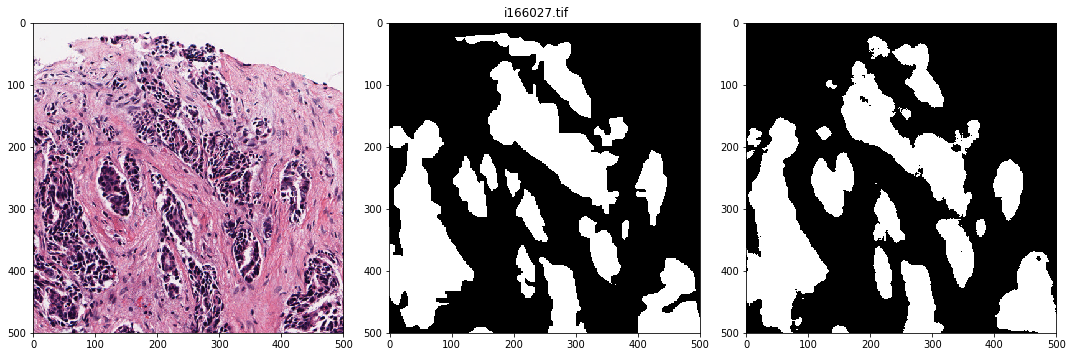

In [59]:
i = 2

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.imshow(images[i])
ax2.imshow(masks[i], cmap='gray')
ax3.imshow(predictions_mask[i], cmap='gray')

fig.suptitle(images_filename[i].name)

fig.tight_layout()

# Get score

In [61]:
topcoder_metric(masks, predictions_mask)

860307.02067607257

In [62]:
threshold_data = []
for tr in np.arange(0.1, 1.0, 0.1):
    predictions_mask = np.zeros_like(predictions)
    predictions_mask[predictions>tr] = 1
    
    score = topcoder_metric(masks, predictions_mask)
    
    threshold_data.append({'threshold': tr, 'score': score})

In [63]:
threshold_data = pd.DataFrame(threshold_data)

In [64]:
threshold_data

,score,threshold
0,799227.585116,0.1
1,843150.614919,0.2
2,860307.020676,0.3
3,866302.196908,0.4
4,864642.123727,0.5
5,854555.642465,0.6
6,832375.134350,0.7
7,790708.513342,0.8
8,699837.011796,0.9


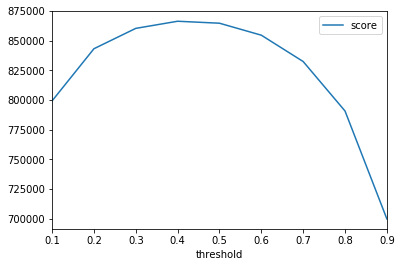

In [65]:
threshold_data.plot(x='threshold', y='score')